### Tầng và Khối
- Khi lần đầu giới thiệu về các mạng nơ ron, ta tập trung vào các mô hình tuyến tính với một đầu ra duy nhất. Như vậy, toàn bộ mô hình chỉ chứa một nơ ron. 
- Lưu ý rằng một nơ ron đơn lẻ có những tính chất sau:
    1. Nhận một vài đầu vào
    2. Tạo một đầu ra vô hướng tương ứng
    3. Có một tập các tham số liên quan có thể được cập nhật để tối ưu hàm mục tiêu
- Sau đó, khi bắt đầu nghĩ về các mạng có nhiều đầu ra, ta tận dụng các phép tính vector để mô tả nguyên một tầng nơ ron. Cũng giống như các nơ ron riêng lẻ, các tầng có những tính chất sau:
    1. Nhận một vài đầu vào
    2. Tạo ra các đầu ra tương ứng
    3. Được mô tả bằng một tập các tham số có thể điều chỉnh được
- Trong hồi quy softmax, bản thân tầng duy nhất ấy chính là một mô hình. Thậm chí đối với các perceptron đa tầng, ta vẫn có thể nghĩ về chúng theo cấu trúc cơ bản này.

- Đối với các perceptron đa tằng, cả mô hình và các tầng cấu thành đều chia sẻ cấu trúc này, mô hình có các đặc điểm sau:
    1. Toàn bộ mô hình nhận các đầu vào thô (các đặc trưng)
    2. Tạo đầu ra (các dự đoán)
    3. Sở hữu các tham số (được tập hợp từ các tầng cấu thành). 
- Tương tự, mỗi tầng riêng lẻ cũng nhận các đầu vào (được cung cấp bởi tầng trước đó), tính toán các đầu ra và có một tập các tham số có thể điều hcinhr thông qua việc cập nhật dựa trên tính hiệu dược truyền ngược từ tầng kế tiếp.

- Để lập trình các mạng phức tạp, ta sẽ cần khải niệm KHỐI trong mạng nơ ron.   
    + Một khối có thể mô tả một tầng duy nhất, một mảng đa tầng hoặc toàn bộ mô hình. 
    + Dưới góc nhìn của xây dựng phần mềm, một Block (khối) là một lớp. 
    + Bất kỳ một lớp con nào của Block đều phải định nghĩa phương thức forward để chuyển hóa đầu vào thành đầu ra và phải lưu trữ mọi tham số cần thiết.
    + Một Block phải sở hữu phương thức backward cho mục đích tính toán gradient.
    + Nhờ sự trợ giúp đắc lực của autograd nên khi định nghĩa Block, ta chỉ cần quan tâm đến các tham số và hàm forward.

- Một lợi ích khi làm việc ở mức độ trừu tượng Block đó là ta có thể kết hợp chúng để tạo thành các phần lớn hơn. 

    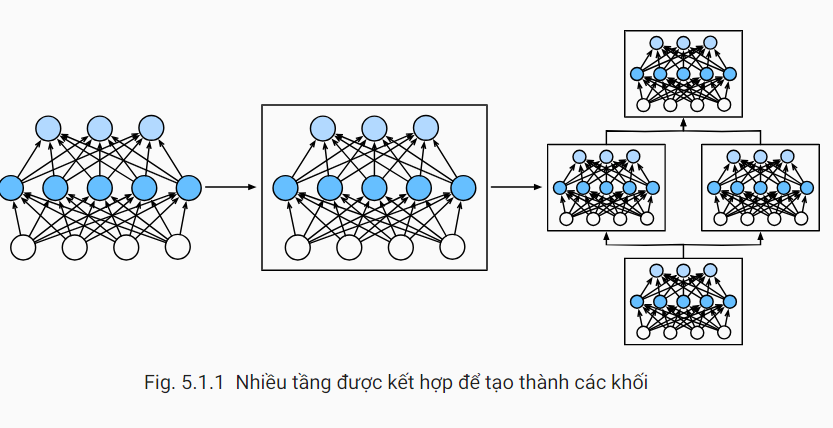

    

- Bằng cách định nghĩa các khối với độ phức tạp tùy ý, các mạng nơ ron phức tạp có thể được lập trình với mã nguồn ngắn gọn.
- Ta xem lại các khối mà ta đã sử dụng để lập trinhg perceptron đa tầng. Đoạn mã sau đâu tạo ra một mạng gồm một tầng ẩn kết nối đầy đủ với 256 nút sử dụng hàm kích hoạt ReLU, theo sau là một tầng đầu ra kết nối đầy đủ với 10 nút (không có hàm kích hoạt)

In [118]:
from mxnet import np, npx
from mxnet.gluon import nn

npx.set_np()

x = np.random.uniform(size = (2, 10))

net = nn.Sequential()

net.add(nn.Dense(256, activation='relu'), 
        nn.Dense(10))

net.initialize()

net(x)

array([[ 0.0704658 , -0.00984608,  0.01052552, -0.03187453,  0.01284136,
        -0.0518318 , -0.01485609, -0.00710839,  0.01851375, -0.01860235],
       [ 0.08181161, -0.0202739 , -0.02253944, -0.0278703 , -0.06795789,
        -0.05475464, -0.01968876, -0.02618478,  0.01376193, -0.03483221]])

- Trong ví dụ trên, ta đã xây dựng mô hình bằng cách khởi tạo đối tượng nn.Sequential và gán vào biến net. Sau đó, ta gọi phương thức add nhiều lần để kết nối các tầng theo thứ tự mà chúng sẽ được thực thi. 
- Nói ngắn gọn, nn.Sequential định nghĩa một loại Block đặc biệt có nhiệm vụ duy trì một danh sách chứa các Block cầu thành được sắp xếp theo thứ tự nhất định.
- Phương thức add chỉ đơn giản hỗ trợ việc thêm liên tiếp từng Block vào trong danh sách đó.
- Lưu ý rằng mỗi tầng là một thực thể của lớp Dense và bản thân lớp Dense lại là một lớp con của Block. 
- Hàm forward cũng rất đơn giản: Nó xâu chuỗi từng Block trong danh sách lại với nhau, chuyển đầu ra của từng khối thành đầu vào cho khối tiếp theo.
- Từ đầu đến giờ, ta đã gọi mô hình thông qua net(X) để thu được đầu ra, thực chất đây chỉ là cách viết tắt của net.forward(x), một thủ thuật Python có thể đạt được thông qua hàm __call__ của lớp Block.

#### 1. Một khối tùy chỉnh
- Có lẽ cách dễ nhất để hiểu rõ nn.Block hoạt động như thế nào là tự lập trình nó. Dưới đây là những chức năng cơ bản mà một Block phải cung cấp
    1. Phương thức forward nhận đối số là dữ liệu đầu vào
    2. Phương thuiwcs forward trả về một giá trị đầu ra. Lưu ý rằng đầu ra có thể khác với đầu vào. Ví dụ, tầng Dense đầu tiên trong mô hình trên nhận đầu vào có kích thước tùy ý nhưng trả về đầu ra có kích thước 256
    3. Tính gradient của đầu ra theo đầu vào bằng phương thức backward, thường thì việc này được thực hiện tự động.
    4. Lưu trữ và cung cấp quyền truy cập đến những tham số cần thiết để tiến hành phương thức tính toán forward
    5. Khởi tạo các tham số khi cần thiết
- Trong đoạn mã dưới đây, chúng ta lập trình từ đầu một Block tương đương với một perceptron đa tầng chỉ có một tầng ẩn và 256 nút ẩn, một tầng đầu ra 10 chiều. Lưu ý rằng lớp MLP bên dưới đây kế thừa từ lớp Block. 
- Ta sẽ phụ thuộc nhiều vào các phương thức của lớp cha, và chỉ tự viết phương thức "__init__" và forward:

In [119]:
from mxnet.gluon import nn

class MLP(nn.Block):
    # Declare a layer with model parameters. Here, we declare 2 fully connected layers
    def __init__(self, **kwargs):
        # Call the constructor of the MLP parent class Block to perform the 
        # necessary initialization. In this way, other function parameters can also 
        # be specified when constructing an instance, such as the model parameter.
        super(MLP, self).__init__(**kwargs)
        self.hidden = nn.Dense(256, activation='relu') # Hidden layer
        self.output = nn.Dense(10) # Output layer
    def forward(self, x):
        return self.output(self.hidden(x))
    

- Xét phương thức forward. Lưu ý rằng nó nhận giá trị đầu vào x, tính toán tầng biểu diễn ẩn self.hidden(x) và trả về các giá trị logit. Ở cách lập trình MLP này, cả hai tầng hidden và output  đều là các biến thực thể.
- Ta khởi tạo các tầng của MLP trong phương thức __init__ (hàm khởi tạo) và sau đó gọi tên các tầng này mỗi khi ta gọi phương thức forward. 
    1. Đầu tiên, phương thức __init__ tùy chỉnh của ta gọi phương thức __init__ của lớp cha thông qua super(MLP, self).__init___(**kwargs) để tránh việc viết lại mã khởi tạo cho tất cả các khối. 
    2. Tiếp theo ta khởi tạo hai tầng Dense, gán chúng lần lượt là self.hidden và self.output. Chú ý rằng trừ khi phát triển một toán tử mới thì ta không cần phải lo lắng về lan truyền ngược (phương thức backward) hoặc khởi tạo tham số (initialize). Bluon sẽ tự động khởi tạo phương thức đó.

In [120]:
net = MLP()
net.initialize()
net(x)

array([[ 0.03707449, -0.03088748,  0.03950972, -0.02401419, -0.00726841,
         0.05381205, -0.03595784,  0.00233961, -0.03385284, -0.01948877],
       [ 0.04702017, -0.05269618,  0.07316877,  0.00203812, -0.02755482,
         0.09842344, -0.06125965, -0.05526558, -0.03436833, -0.02430232]])

- Ưu điểm chính của phép trừu tượng hóa Block là tính linh hoạt của nó. Ta có thể kế thừa từ lớp Block để tạo các tầng (chẳng hạn như lớp Dense được cung cấp bởi Gluon) hoặc toàn bộ mô hình.
- Ta sẽ sử dụng tính linh hoạt này xuyên suốt, đặc biệt là khi làm việc với mạng nơ ron tích chập.

#### 2. Khối tuần tự
- Bây giờ ta có thể có cái nhìn rõ hơn về cách mà lớp Sequential (tuần tự) hoạt động. Nhắc lại rằng Sequential được thiết kế để xâu chuỗi các Khối lại với nhau.
- Để tự xâu dựng lớp MySequential đơn giản, ta chỉ cần định nghĩa hai phương thức chính như sau:
    1. Phương thức add nhằm đẩy từng Block vào trong danh sách.
    2. Phương thức forward nhằm truyền một đầu vào qua chuỗi các Blocks theo thứ tự mà chúng được nối
- Lớp MySequential dưới đây cung cấp tính năng giống như lớp Sequential mặc định của Gluon:

In [121]:
class MySequential(nn.Block):
    def add(self, block):
        # Here, block is an instance of a Block subclass, and we assume it has
        # a unique name, we save it in the member variable _children of the Block
        # class and its type is OrderedDict. When the MySequential instance calls 
        # the initialize functuon, the system automatically initializes all members of _children
        self._children[block.name] = block
    def forward(self, x):
        # OrderedDoct guarantees that members will be traversed in the order they were added
        for block in self._children.values():
            x = block(x)
        return x

- Phương thức add thêm một Block đơn vào từ điển có thứ tự _children. 
- Mỗi Block của Gluon đều sở hữu một thuộc tính _children và ta sử dụng nó thay vì tự tạo ra một danh sách python. Thật ra, ưu điểm chính của _children là trong quá trình khởi tạo trọng số ban đầu của các khổi, Gluon sẽ tự động tìm các khối con có trọng số cần được khởi tạo trong từ điển này.
- Khi phương thức forward của khối MySequential được gọi, các Block sẽ được thực thi theo thứ tự mà chúng được thêm vào. Bây giờ ta có thể lập trình lại một MLP sử dụng lớp MySequential.

In [122]:
net = MySequential()
net.add(nn.Dense(256, 'relu'))
net.add(nn.Dense(10))
net.initialize()
net(x)

array([[ 0.00418995,  0.01379037,  0.02859745, -0.02438577, -0.02926301,
         0.01674132,  0.04270357, -0.001722  , -0.02230111,  0.01311198],
       [-0.01963867,  0.0182263 ,  0.03599571, -0.04389403, -0.01795751,
         0.05011034,  0.04968927, -0.00716259,  0.0066808 ,  0.05930639]])

#### 3. Thực thi mã trong phương thức forward
- Lớp nn.Sequential giúp việc xây dựng mô hình trở nên dễ hơn, cho phép ta xây dựng các kiến trúc mới mà không cần phải tự định nghĩa một lớp riêng. 
- Tuy nhiên, không phải tất cả mô hình đều có cấu trúc chuỗi xích đơn giản, khi cần linh hoạt hơn ta vẫn sẽ muốn tự định nghĩa Block theo cách của mình. Bí dụ như khi muốn sử dụng luồng điều khiển python trong lượt truyền xuôi. Ta cũng có thể cần thực hiện các phép toán tùy ý thay vì chỉ dựa vào các tầng mạng nơ ron đã được định nghĩa từ trước.
- Tất cả phép toán trong mạng tới giờ đều thao tác trên giá trị kích hoạt và tham số của mạng. Tuy nhiên, trong một vài trường hợp, ta có thể muốn kết hợp thêm hằng số. Chúng không phải là kết quả của tầng trước mà cũng không phải tham số có thể cập nhật được. Ví dụ như ta muốn một tầng tính hàm f(x, w) = c * transpose(w) * x, trong đó x, w là tham số và c là một hằng số cho trước được giữ nguyên giá trị trong suốt quá trình tối ưu hóa.
- Khai báo hằng số một cách tường minh bằng cách sử dụng get_constant giúp Gluon tăng tốc độ thực thi. Trong đoạn mã sau, ta lập trình một mô hình mà không hề dễ lắp ráp nếu sử dụng Sequential và các tầng được định nghĩa trước. 

In [123]:
class FixedHiddenMLP(nn.Block):
    def __init__(self, **kwargs):
        super(FixedHiddenMLP, self).__init__(**kwargs)

        # Random weight parameters created with the get_constant are not iterated during training
        self.rand_weight = self.params.get_constant(
            'rand_weight', np.random.uniform(size = (20, 20))
        )
        self.dense = nn.Dense(20, activation='relu')

    def forward(self, x):
        x = self.dense(x)
        
        # Use the constant parameters created, as well as the relu and fot functions
        x = npx.relu(np.dot(x, self.rand_weight.data()) + 1)
        # Reuse the fully connected layer. This is equivalent to sharing parameters
        # with two fully connected layers
        x = x.reshape((-1, 10))
        x = self.dense(x)

        # Here in Control flow, we need to call asscalar to return the scalar for comparison
        while np.abs(x).sum() > 1:
            x /= 2
        return x.sum()

In [124]:
net = FixedHiddenMLP()
net.initialize()
print(x.shape)
net2 = nn.Sequential()
net2.add(nn.Dense(20))
net2.initialize()
print(net2(x).shape)
net(x)

(2, 10)
(2, 20)


array(0.8460388)

In [127]:
class NestMLP(nn.Block):
    def __init__(self, **kwargs):
        super(NestMLP, self).__init__(**kwargs)
        self.net = nn.Sequential()
        self.net.add(nn.Dense(64, activation='relu'),
                     nn.Dense(32, activation='relu'))
        self.dense = nn.Dense(16, activation='relu')

    def forward(self, x):
        return self.dense(self.net(x))

chimera = nn.Sequential()
chimera.add(nn.Dense(20))

chimera.initialize()
chimera(x)

array([[-0.02184298, -0.10440577,  0.02712841,  0.00166894,  0.00847984,
        -0.02876176,  0.06698152, -0.00209869,  0.03194575,  0.02433742,
         0.06124323,  0.0188878 , -0.10891943,  0.1195674 , -0.04508264,
        -0.01081772,  0.12640539, -0.12788126,  0.19205993,  0.03334733],
       [-0.04185601, -0.0113601 ,  0.08078129,  0.02676185,  0.015527  ,
        -0.05901328,  0.07837533, -0.00826815, -0.12048848,  0.04542181,
        -0.03939819,  0.04804905, -0.12662819,  0.09533954, -0.0058033 ,
        -0.14801534,  0.0961697 , -0.1366522 ,  0.09855351,  0.03839739]])